In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_excel('Data_Train.xlsx')

In [3]:
numF=train.select_dtypes(include=[np.number])
numF.head()

Year  Kilometers_Driven  Seats  Price
0  2010              72000    5.0   1.75
1  2015              41000    5.0  12.50
2  2011              46000    5.0   4.50
3  2012              87000    7.0   6.00
4  2013              40670    5.0  17.74

In [4]:
catF=train.select_dtypes(include=[np.object])
catF.head()

Name    Location Fuel_Type Transmission  \
0            Maruti Wagon R LXI CNG      Mumbai       CNG       Manual   
1  Hyundai Creta 1.6 CRDi SX Option        Pune    Diesel       Manual   
2                      Honda Jazz V     Chennai    Petrol       Manual   
3                 Maruti Ertiga VDI     Chennai    Diesel       Manual   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore    Diesel    Automatic   

  Owner_Type     Mileage   Engine      Power  New_Price  
0      First  26.6 km/kg   998 CC  58.16 bhp        NaN  
1      First  19.67 kmpl  1582 CC  126.2 bhp        NaN  
2      First   18.2 kmpl  1199 CC   88.7 bhp  8.61 Lakh  
3      First  20.77 kmpl  1248 CC  88.76 bhp        NaN  
4     Second   15.2 kmpl  1968 CC  140.8 bhp        NaN

In [5]:
train['Name'].unique().size

1876

In [6]:
t=train['Name'].str.split()
compName=t.str[0]
train['Comp_Name']=pd.Series(compName)
#train.insert(column='Comp_Name',value=compName,loc=1)
train.head()


Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price Comp_Name  
0        NaN   1.75    Maruti  
1        NaN  12.50   Hyundai  
2  8.61 Lakh   4.50     Honda  
3        NaN   6.00    Maruti  
4        NaN  17.74      Audi

In [7]:
catF.insert(column='Comp_Name',value=compName,loc=1)
catF['Comp_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [8]:
cn=catF['Comp_Name'].values
cn

array(['Maruti', 'Hyundai', 'Honda', ..., 'Mahindra', 'Maruti',
       'Chevrolet'], dtype=object)

In [9]:
for i in range(train.shape[0]):
  if (cn[i]=='Land'):
    cn[i]='Land Rover'
  if (cn[i]=='ISUZU'):
    cn[i]='Isuzu'
  if (cn[i]=='Mini'):
    cn[i]='Mini Cooper'
  if (cn[i]=='Force'):
    cn[i]='Force One LX'

In [10]:
train=train.drop('Comp_Name',axis=1)
catF=catF.drop('Comp_Name',axis=1)

In [11]:
train.insert(column='Comp_Name',value=cn,loc=1)
catF.insert(column='Comp_Name',value=cn,loc=1)

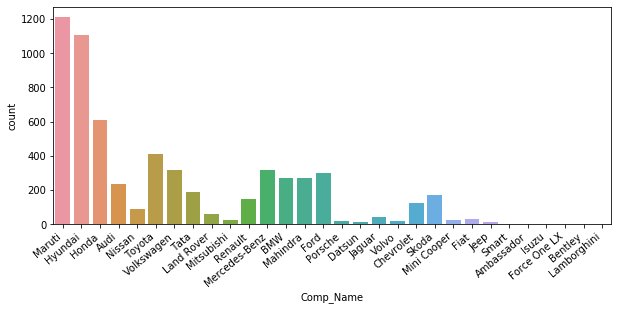

In [12]:
plt.figure(figsize=(10,4))
a=sns.countplot('Comp_Name',data=train)
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.show()

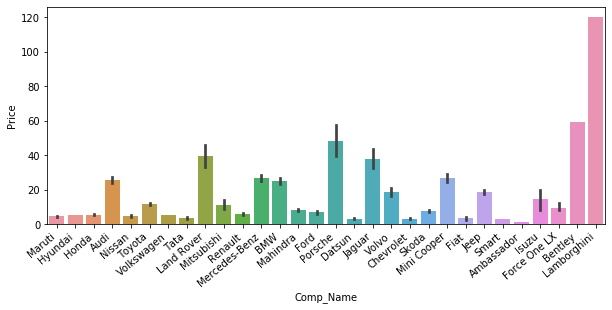

In [13]:
plt.figure(figsize=(10,4))
b=sns.barplot(x='Comp_Name',y='Price',data=train)
b.set_xticklabels(b.get_xticklabels(),rotation=40,ha='right')
plt.show()

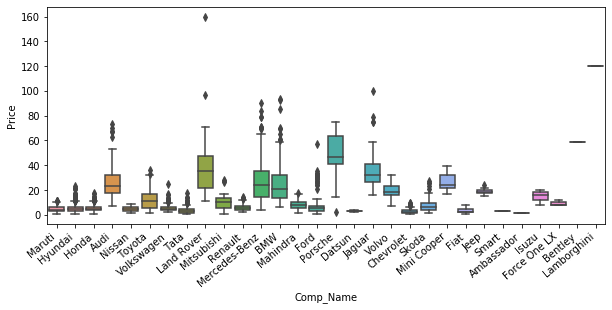

In [14]:
plt.figure(figsize=(10,4))
b=sns.boxplot('Comp_Name','Price',data=train)
b.set_xticklabels(b.get_xticklabels(),rotation=40,ha='right')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

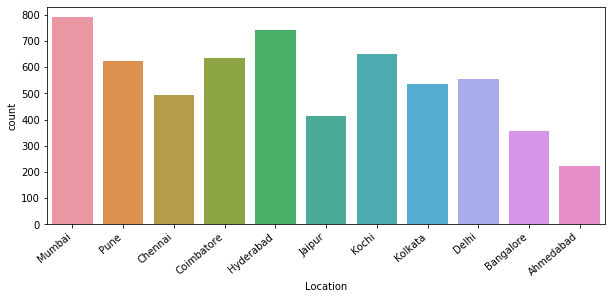

In [15]:
plt.figure(figsize=(10,4))
a=sns.countplot('Location',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

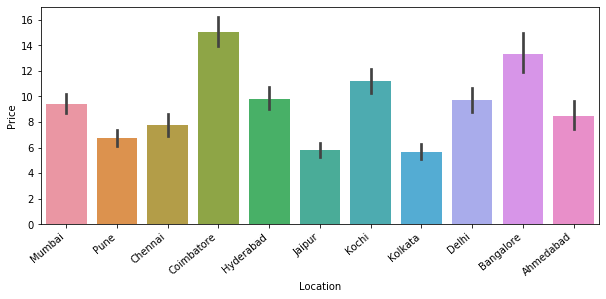

In [16]:
plt.figure(figsize=(10,4))
a=sns.barplot('Location','Price',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

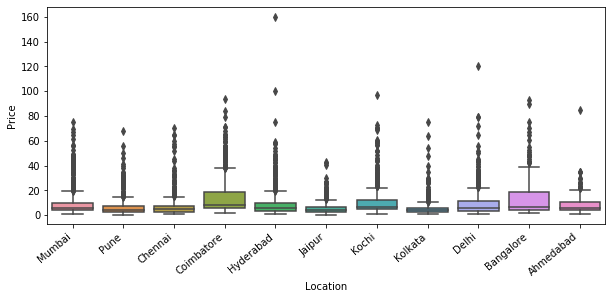

In [17]:
plt.figure(figsize=(10,4))
a=sns.boxplot('Location','Price',data=train)
a.set_xticklabels(a.get_xticklabels(),rotation=40,ha='right')
plt.show

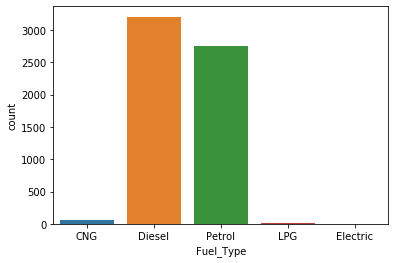

In [18]:
sns.countplot('Fuel_Type',data=train)

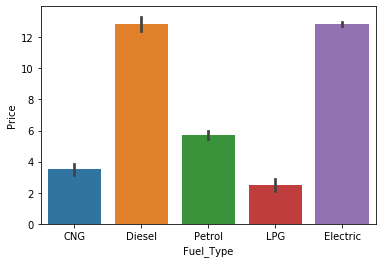

In [19]:
sns.barplot('Fuel_Type','Price',data=train)

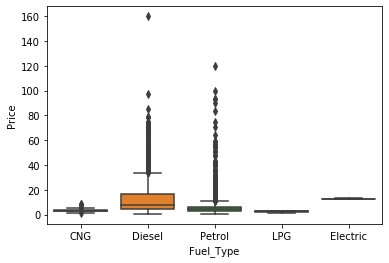

In [20]:
sns.boxplot('Fuel_Type','Price',data=train)

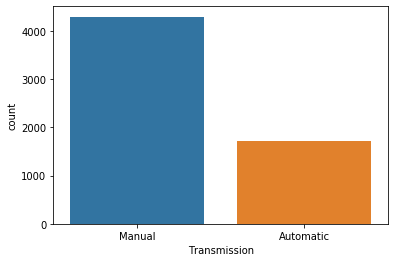

In [21]:
sns.countplot('Transmission',data=train)

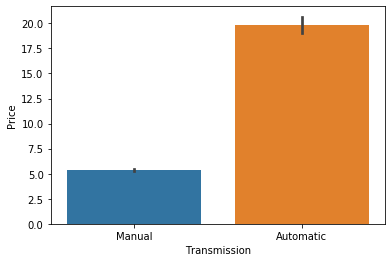

In [22]:
sns.barplot('Transmission','Price',data=train)

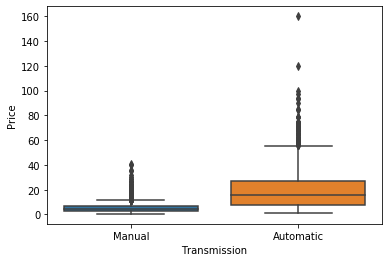

In [23]:
sns.boxplot('Transmission','Price',data=train)

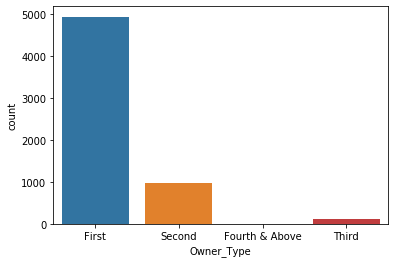

In [24]:
sns.countplot('Owner_Type',data=train)

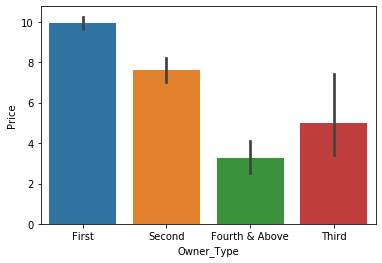

In [25]:
sns.barplot('Owner_Type','Price',data=train)

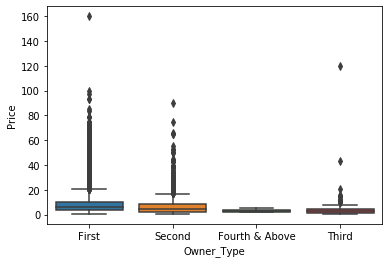

In [26]:
sns.boxplot('Owner_Type','Price',data=train)

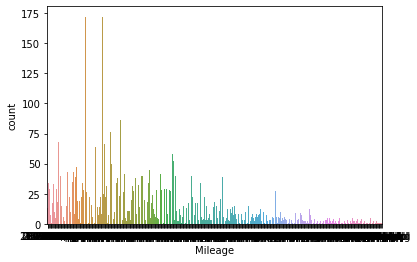

In [27]:
sns.countplot('Mileage',data=train)

In [28]:
train['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 6019, dtype: object

In [29]:
t=train['Mileage'].str.split()
mylg=t.str[0]
mylgCount=t.str[1]
mylgCount.value_counts()

kmpl     5951
km/kg      66
Name: Mileage, dtype: int64

In [30]:
train.insert(column='Mileage_Num',value=mylg,loc=8)
train.head()

Name Comp_Name    Location  Year  \
0            Maruti Wagon R LXI CNG    Maruti      Mumbai  2010   
1  Hyundai Creta 1.6 CRDi SX Option   Hyundai        Pune  2015   
2                      Honda Jazz V     Honda     Chennai  2011   
3                 Maruti Ertiga VDI    Maruti     Chennai  2012   
4   Audi A4 New 2.0 TDI Multitronic      Audi  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type Mileage_Num  \
0              72000       CNG       Manual      First        26.6   
1              41000    Diesel       Manual      First       19.67   
2              46000    Petrol       Manual      First        18.2   
3              87000    Diesel       Manual      First       20.77   
4              40670    Diesel    Automatic     Second        15.2   

      Mileage   Engine      Power  Seats  New_Price  Price  
0  26.6 km/kg   998 CC  58.16 bhp    5.0        NaN   1.75  
1  19.67 kmpl  1582 CC  126.2 bhp    5.0        NaN  12.50  
2   18.2 kmpl  1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50  
3  20.77 kmpl  1248 CC  88.76 bhp    7.0        NaN   6.00  
4   15.2 kmpl  1968 CC  140.8 bhp    5.0        NaN  17.74

In [31]:
numF.insert(column='Mileage_Num',value=mylg,loc=3)
numF

Year  Kilometers_Driven  Seats Mileage_Num  Price
0     2010              72000    5.0        26.6   1.75
1     2015              41000    5.0       19.67  12.50
2     2011              46000    5.0        18.2   4.50
3     2012              87000    7.0       20.77   6.00
4     2013              40670    5.0        15.2  17.74
...    ...                ...    ...         ...    ...
6014  2014              27365    5.0        28.4   4.75
6015  2015             100000    5.0        24.4   4.00
6016  2012              55000    8.0        14.0   2.90
6017  2013              46000    5.0        18.9   2.65
6018  2011              47000    5.0       25.44   2.50

[6019 rows x 5 columns]

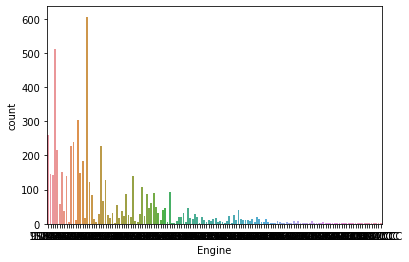

In [32]:
sns.countplot('Engine',data=train)

In [33]:
train['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 6019, dtype: object

In [34]:
t=train['Engine'].str.split()
engNum=t.str[0]
train.insert(column='Engine_Num',value=engNum,loc=10)
numF.insert(column='Engine_Num',value=engNum,loc=4)

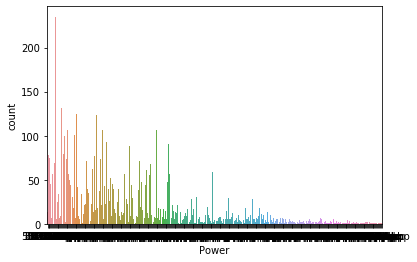

In [35]:
sns.countplot('Power',data=train)

In [36]:
train['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [37]:
t=train['Power'].str.split()
power=t.str[0]
train.insert(column='Power_Num',value=power,loc=12)
numF.insert(column='Power_Num',value=power,loc=5)

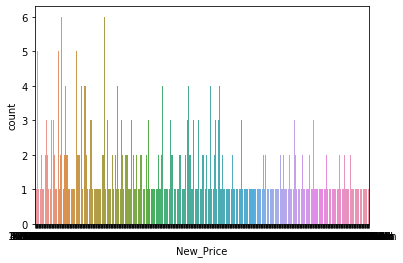

In [38]:
sns.countplot('New_Price',data=train)

In [39]:
train['New_Price']

0             NaN
1             NaN
2       8.61 Lakh
3             NaN
4             NaN
          ...    
6014    7.88 Lakh
6015          NaN
6016          NaN
6017          NaN
6018          NaN
Name: New_Price, Length: 6019, dtype: object

In [40]:
t=train['New_Price'].str.split()
newPrice=t.str[0]
npType=t.str[1]
npType.value_counts()

Lakh    807
Cr       17
Name: New_Price, dtype: int64

In [41]:
for i in range(train.shape[0]):
  if (npType[i]== 'Cr'):
    newPrice[i]=float(newPrice[i])*100

In [42]:
train.insert(column='NewPrice_Num',value=newPrice,loc=15)
numF.insert(column='NewPrice_Num',value=newPrice,loc=6)

In [43]:
catF.drop(['Engine','Mileage','Power','Name'],axis=1)

Comp_Name    Location Fuel_Type Transmission Owner_Type  New_Price
0        Maruti      Mumbai       CNG       Manual      First        NaN
1       Hyundai        Pune    Diesel       Manual      First        NaN
2         Honda     Chennai    Petrol       Manual      First  8.61 Lakh
3        Maruti     Chennai    Diesel       Manual      First        NaN
4          Audi  Coimbatore    Diesel    Automatic     Second        NaN
...         ...         ...       ...          ...        ...        ...
6014     Maruti       Delhi    Diesel       Manual      First  7.88 Lakh
6015    Hyundai      Jaipur    Diesel       Manual      First        NaN
6016   Mahindra      Jaipur    Diesel       Manual     Second        NaN
6017     Maruti     Kolkata    Petrol       Manual      First        NaN
6018  Chevrolet   Hyderabad    Diesel       Manual      First        NaN

[6019 rows x 6 columns]

In [44]:
train.isnull().sum()

Name                    0
Comp_Name               0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage_Num             2
Mileage                 2
Engine_Num             36
Engine                 36
Power_Num              36
Power                  36
Seats                  42
NewPrice_Num         5195
New_Price            5195
Price                   0
dtype: int64

In [45]:
train=train.fillna(0)
numF=numF.fillna(0)

In [46]:
train.isnull().sum()

Name                 0
Comp_Name            0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage_Num          0
Mileage              0
Engine_Num           0
Engine               0
Power_Num            0
Power                0
Seats                0
NewPrice_Num         0
New_Price            0
Price                0
dtype: int64

In [47]:
train['Mileage_Num']=train['Mileage_Num'].astype(float)
train['Engine_Num']=train['Engine_Num'].astype(float)
#train['Power_Num']=train['Power_Num'].astype(float)
train['NewPrice_Num']=train['NewPrice_Num'].astype(float)

In [48]:
train.loc[train['Power_Num']=='null']

Name Comp_Name   Location  Year  \
76                Ford Fiesta 1.4 SXi TDCi      Ford     Jaipur  2008   
79                  Hyundai Santro Xing XL   Hyundai  Hyderabad  2005   
89                  Hyundai Santro Xing XO   Hyundai  Hyderabad  2007   
120   Hyundai Santro Xing XL eRLX Euro III   Hyundai     Mumbai  2005   
143    Hyundai Santro Xing XO eRLX Euro II   Hyundai      Kochi  2008   
...                                    ...       ...        ...   ...   
5873   Hyundai Santro Xing XO eRLX Euro II   Hyundai       Pune  2006   
5893                     Maruti Estilo LXI    Maruti    Chennai  2008   
5925           Skoda Laura Classic 1.8 TSI     Skoda       Pune  2010   
5943               Mahindra Jeep MM 540 DP  Mahindra    Chennai  2002   
5985                       Toyota Etios GD    Toyota      Delhi  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage_Num  \
76               111111    Diesel       Manual      First        17.80   
79                87591    Petrol       Manual      First         0.00   
89                73745    Petrol       Manual      First        17.00   
120              102000    Petrol       Manual     Second        17.00   
143               80759    Petrol       Manual      Third        17.00   
...                 ...       ...          ...        ...          ...   
5873              47200    Petrol       Manual     Second        17.00   
5893              51000    Petrol       Manual     Second        19.50   
5925              85000    Petrol       Manual      First        17.50   
5943              75000    Diesel       Manual      First         0.00   
5985              70000    Diesel       Manual      First        23.59   

         Mileage  Engine_Num   Engine Power_Num     Power  Seats  \
76     17.8 kmpl      1399.0  1399 CC      null  null bhp    5.0   
79      0.0 kmpl      1086.0  1086 CC      null  null bhp    5.0   
89     17.0 kmpl      1086.0  1086 CC      null  null bhp    5.0   
120    17.0 kmpl      1086.0  1086 CC      null  null bhp    5.0   
143    17.0 kmpl      1086.0  1086 CC      null  null bhp    5.0   
...          ...         ...      ...       ...       ...    ...   
5873   17.0 kmpl      1086.0  1086 CC      null  null bhp    5.0   
5893   19.5 kmpl      1061.0  1061 CC      null  null bhp    0.0   
5925   17.5 kmpl      1798.0  1798 CC      null  null bhp    5.0   
5943    0.0 kmpl      2112.0  2112 CC      null  null bhp    6.0   
5985  23.59 kmpl      1364.0  1364 CC      null  null bhp    5.0   

      NewPrice_Num New_Price  Price  
76             0.0         0   2.00  
79             0.0         0   1.30  
89             0.0         0   2.10  
120            0.0         0   0.85  
143            0.0         0   1.67  
...            ...       ...    ...  
5873           0.0         0   1.20  
5893           0.0         0   1.75  
5925           0.0         0   2.85  
5943           0.0         0   1.70  
5985           0.0         0   3.88  

[107 rows x 18 columns]

In [49]:
numF.loc[numF['Power_Num']=='null']

Year  Kilometers_Driven  Seats Mileage_Num Engine_Num Power_Num  \
76    2008             111111    5.0        17.8       1399      null   
79    2005              87591    5.0         0.0       1086      null   
89    2007              73745    5.0        17.0       1086      null   
120   2005             102000    5.0        17.0       1086      null   
143   2008              80759    5.0        17.0       1086      null   
...    ...                ...    ...         ...        ...       ...   
5873  2006              47200    5.0        17.0       1086      null   
5893  2008              51000    0.0        19.5       1061      null   
5925  2010              85000    5.0        17.5       1798      null   
5943  2002              75000    6.0         0.0       2112      null   
5985  2013              70000    5.0       23.59       1364      null   

     NewPrice_Num  Price  
76              0   2.00  
79              0   1.30  
89              0   2.10  
120             0   0.85  
143             0   1.67  
...           ...    ...  
5873            0   1.20  
5893            0   1.75  
5925            0   2.85  
5943            0   1.70  
5985            0   3.88  

[107 rows x 8 columns]

In [50]:
train.loc[train['Power_Num']=='null','Power_Num']=0
numF.loc[numF['Power_Num']=='null','Power_Num']=0

In [51]:
train.loc[train['Power_Num']=='null']

Empty DataFrame
Columns: [Name, Comp_Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage_Num, Mileage, Engine_Num, Engine, Power_Num, Power, Seats, NewPrice_Num, New_Price, Price]
Index: []

In [52]:
numF.loc[numF['Power_Num']=='null']

Empty DataFrame
Columns: [Year, Kilometers_Driven, Seats, Mileage_Num, Engine_Num, Power_Num, NewPrice_Num, Price]
Index: []

In [53]:
train['Power_Num']=train['Power_Num'].astype(float)

In [54]:
train['Power_Num'].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,   0.   , 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

In [55]:
train.corr()

Year  Kilometers_Driven  Mileage_Num  Engine_Num  \
Year               1.000000          -0.173048     0.320643   -0.030592   
Kilometers_Driven -0.173048           1.000000    -0.064915    0.087549   
Mileage_Num        0.320643          -0.064915     1.000000   -0.549938   
Engine_Num        -0.030592           0.087549    -0.549938    1.000000   
Power_Num          0.084728           0.022738    -0.419891    0.844788   
Seats              0.060698           0.068683    -0.209828    0.429216   
NewPrice_Num       0.189466          -0.051113    -0.030041    0.191659   
Price              0.305327          -0.011493    -0.306191    0.647232   

                   Power_Num     Seats  NewPrice_Num     Price  
Year                0.084728  0.060698      0.189466  0.305327  
Kilometers_Driven   0.022738  0.068683     -0.051113 -0.011493  
Mileage_Num        -0.419891 -0.209828     -0.030041 -0.306191  
Engine_Num          0.844788  0.429216      0.191659  0.647232  
Power_Num           1.000000  0.170102      0.290984  0.751724  
Seats               0.170102  1.000000      0.014850  0.057656  
NewPrice_Num        0.290984  0.014850      1.000000  0.425091  
Price               0.751724  0.057656      0.425091  1.000000

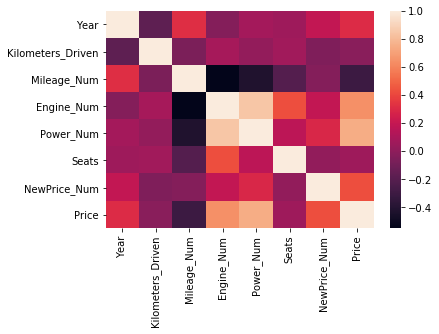

In [56]:
sns.heatmap(train.corr())

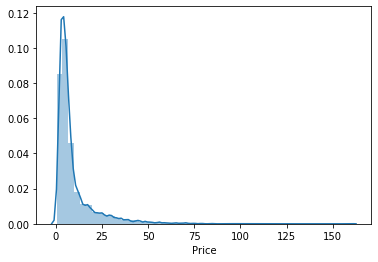

In [58]:
sns.distplot(train['Price'])

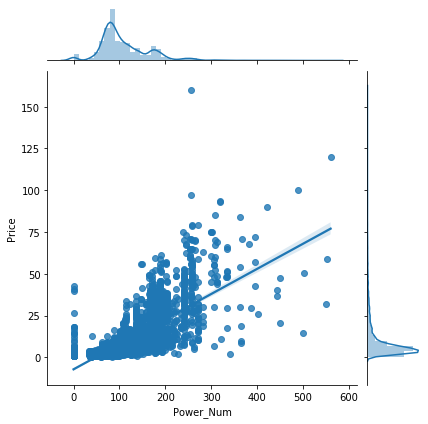

In [59]:
sns.jointplot(x='Power_Num',y='Price',data=train,kind='reg')

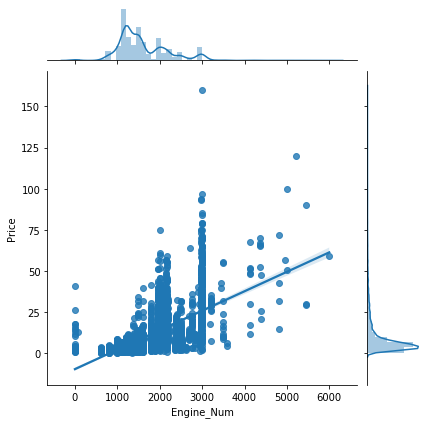

In [60]:
sns.jointplot('Engine_Num','Price',data=train,kind='reg')

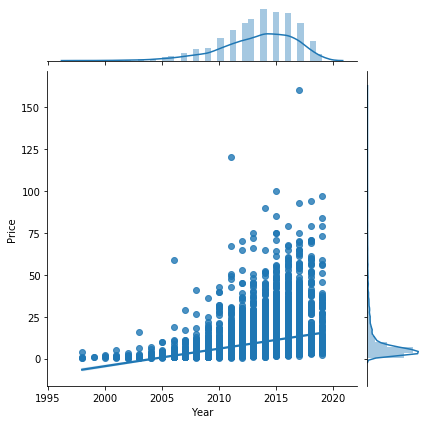

In [62]:
sns.jointplot('Year','Price',data=train,kind='reg')

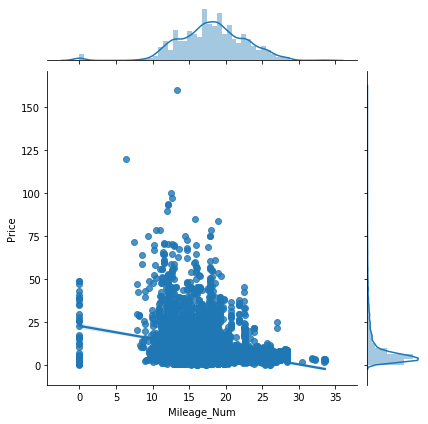

In [63]:
sns.jointplot('Mileage_Num','Price',data=train,kind='reg')

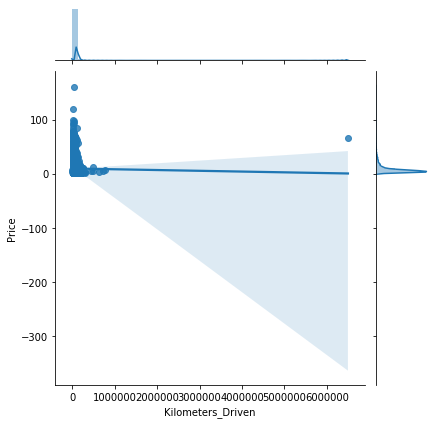

In [65]:
sns.jointplot('Kilometers_Driven','Price',data=train,kind='reg')

In [66]:
catF=catF.drop(['Name','Mileage','Engine','Power','New_Price'],axis=1)
catF.head()

Comp_Name    Location Fuel_Type Transmission Owner_Type
0    Maruti      Mumbai       CNG       Manual      First
1   Hyundai        Pune    Diesel       Manual      First
2     Honda     Chennai    Petrol       Manual      First
3    Maruti     Chennai    Diesel       Manual      First
4      Audi  Coimbatore    Diesel    Automatic     Second

In [67]:
Nominal_cat=catF.loc[:,['Comp_Name','Location','Fuel_Type']]
Nominal_cat.head()

Comp_Name    Location Fuel_Type
0    Maruti      Mumbai       CNG
1   Hyundai        Pune    Diesel
2     Honda     Chennai    Petrol
3    Maruti     Chennai    Diesel
4      Audi  Coimbatore    Diesel

In [68]:
Ordinal_cat=catF.loc[:,['Transmission','Owner_Type']]
Ordinal_cat

Transmission Owner_Type
0          Manual      First
1          Manual      First
2          Manual      First
3          Manual      First
4       Automatic     Second
...           ...        ...
6014       Manual      First
6015       Manual      First
6016       Manual     Second
6017       Manual      First
6018       Manual      First

[6019 rows x 2 columns]

In [69]:
Ordinal_cat['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [70]:
Ordinal_cat['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [71]:
trans_temp={'Manual':1,'Automatic':2}
own_temp={'Fourth & Above':1,'Third':2,'Second':3,'First':4}
Ordinal_cat['Transmission_enc']=Ordinal_cat.Transmission.map(trans_temp)
Ordinal_cat['OwnerType_enc']=Ordinal_cat.Owner_Type.map(own_temp)

In [72]:
Ordinal_cat

Transmission Owner_Type  Transmission_enc  OwnerType_enc
0          Manual      First                 1              4
1          Manual      First                 1              4
2          Manual      First                 1              4
3          Manual      First                 1              4
4       Automatic     Second                 2              3
...           ...        ...               ...            ...
6014       Manual      First                 1              4
6015       Manual      First                 1              4
6016       Manual     Second                 1              3
6017       Manual      First                 1              4
6018       Manual      First                 1              4

[6019 rows x 4 columns]

In [73]:
dm=pd.get_dummies(data=Nominal_cat)
dm

Comp_Name_Ambassador  Comp_Name_Audi  Comp_Name_BMW  Comp_Name_Bentley  \
0                        0               0              0                  0   
1                        0               0              0                  0   
2                        0               0              0                  0   
3                        0               0              0                  0   
4                        0               1              0                  0   
...                    ...             ...            ...                ...   
6014                     0               0              0                  0   
6015                     0               0              0                  0   
6016                     0               0              0                  0   
6017                     0               0              0                  0   
6018                     0               0              0                  0   

      Comp_Name_Chevrolet  Comp_Name_Datsun  Comp_Name_Fiat  \
0                       0                 0               0   
1                       0                 0               0   
2                       0                 0               0   
3                       0                 0               0   
4                       0                 0               0   
...                   ...               ...             ...   
6014                    0                 0               0   
6015                    0                 0               0   
6016                    0                 0               0   
6017                    0                 0               0   
6018                    1                 0               0   

      Comp_Name_Force One LX  Comp_Name_Ford  Comp_Name_Honda  ...  \
0                          0               0                0  ...   
1                          0               0                0  ...   
2                          0               0                1  ...   
3                          0               0                0  ...   
4                          0               0                0  ...   
...                      ...             ...              ...  ...   
6014                       0               0                0  ...   
6015                       0               0                0  ...   
6016                       0               0                0  ...   
6017                       0               0                0  ...   
6018                       0               0                0  ...   

      Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                   0               0                 0                1   
1                   0               0                 0                0   
2                   0               0                 0                0   
3                   0               0                 0                0   
4                   0               0                 0                0   
...               ...             ...               ...              ...   
6014                0               0                 0                0   
6015                1               0                 0                0   
6016                1               0                 0                0   
6017                0               0                 1                0   
6018                0               0                 0                0   

      Location_Pune  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  \
0                 0              1                 0                   0   
1                 1              0                 1                   0   
2                 0              0                 0                   0   
3                 0              0                 1                   0   
4                 0              0                 1                   0   
...             ...            ...               ...                 ...   
60

Now, we'll prepare our final x features and y to be plugged into the linear regression model.

In [74]:
y=train['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [75]:
x=pd.concat([dm,Ordinal_cat.loc[:,['Transmission_enc','OwnerType_enc']],numF.drop('Price',axis=1)],axis=1)
x['Mileage_Num'].astype(float)
x['Engine_Num'].astype(float)
x['Power_Num'].astype(float)
x['NewPrice_Num'].astype(float)
x

Comp_Name_Ambassador  Comp_Name_Audi  Comp_Name_BMW  Comp_Name_Bentley  \
0                        0               0              0                  0   
1                        0               0              0                  0   
2                        0               0              0                  0   
3                        0               0              0                  0   
4                        0               1              0                  0   
...                    ...             ...            ...                ...   
6014                     0               0              0                  0   
6015                     0               0              0                  0   
6016                     0               0              0                  0   
6017                     0               0              0                  0   
6018                     0               0              0                  0   

      Comp_Name_Chevrolet  Comp_Name_Datsun  Comp_Name_Fiat  \
0                       0                 0               0   
1                       0                 0               0   
2                       0                 0               0   
3                       0                 0               0   
4                       0                 0               0   
...                   ...               ...             ...   
6014                    0                 0               0   
6015                    0                 0               0   
6016                    0                 0               0   
6017                    0                 0               0   
6018                    1                 0               0   

      Comp_Name_Force One LX  Comp_Name_Ford  Comp_Name_Honda  ...  \
0                          0               0                0  ...   
1                          0               0                0  ...   
2                          0               0                1  ...   
3                          0               0                0  ...   
4                          0               0                0  ...   
...                      ...             ...              ...  ...   
6014                       0               0                0  ...   
6015                       0               0                0  ...   
6016                       0               0                0  ...   
6017                       0               0                0  ...   
6018                       0               0                0  ...   

      Fuel_Type_Petrol  Transmission_enc  OwnerType_enc  Year  \
0                    0                 1              4  2010   
1                    0                 1              4  2015   
2                    1                 1              4  2011   
3                    0                 1              4  2012   
4                    0                 2              3  2013   
...                ...               ...            ...   ...   
6014                 0                 1              4  2014   
6015                 0                 1              4  2015   
6016                 0                 1              3  2012   
6017                 1                 1              4  2013   
6018                 0                 1              4  2011   

      Kilometers_Driven  Seats  Mileage_Num  Engine_Num  Power_Num  \
0                 72000    5.0         26.6         998      58.16   
1                 41000    5.0        19.67        1582      126.2   
2                 46000    5.0         18.2        1199       88.7   
3                 87000    7.0        20.77        1248      88.76   
4                 40670    5.0         15.2        1968      140.8   
...                 ...    ...          ...         ...        ...   
6014              27365    5.0         28.4        1248         74   
6015             100000    5.0         24.4        1120         71   
6016              55000    8.0      

In [81]:
rf=RandomForestRegressor()

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [83]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
df=pd.DataFrame({'Actual':y_test,'Predicted':rf.predict(x_test)})
df.head(20)

Actual  Predicted
5206    8.00     9.0568
4147    6.67     5.7495
2077    1.50     2.2849
362     3.25     4.5519
2853    7.75     8.3873
5003    2.75     2.7284
4413    3.04     3.6872
2809    1.59     2.1406
1053    7.20     5.4624
3140    5.27     7.4825
789    15.54    12.8806
3759    3.25     3.9133
4895    2.50     2.4965
38     28.00    31.5653
3924    3.39     3.6503
5118   60.75    60.0852
4737   23.86    13.0546
2150   14.50    11.5512
1030   13.28    14.4005
495     3.20     1.9097

In [85]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf.predict(x_test)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf.predict(x_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf.predict(x_test))))

Mean Absolute Error: 1.4303901973580129
Mean Squared Error: 10.276646961617068
Root Mean Squared Error: 3.2057209737619194
